<a href="https://colab.research.google.com/github/prakarshjain28/DL_Activation_Project/blob/master/cifar10_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN using custom activation functions (CIFAR-10 dataset)

This tutorial demonstrates training a simple [Convolutional Neural Network](https://developers.google.com/machine-learning/glossary/#convolutional_neural_network) (CNN) to classify [CIFAR images](https://www.cs.toronto.edu/~kriz/cifar.html). Because this tutorial uses the [Keras Sequential API](https://www.tensorflow.org/guide/keras/overview), creating and training our model will take just a few lines of code.


### Import TensorFlow

In [0]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Download and prepare the CIFAR10 dataset


The CIFAR10 dataset contains `60,000 color images` in `10 classes`, with 6,000 images in each class. The dataset is divided into `50,000 training images` and `10,000 testing images`.

In [0]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170500096/170498071 [==============================] - 6s 0us/step


### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image.


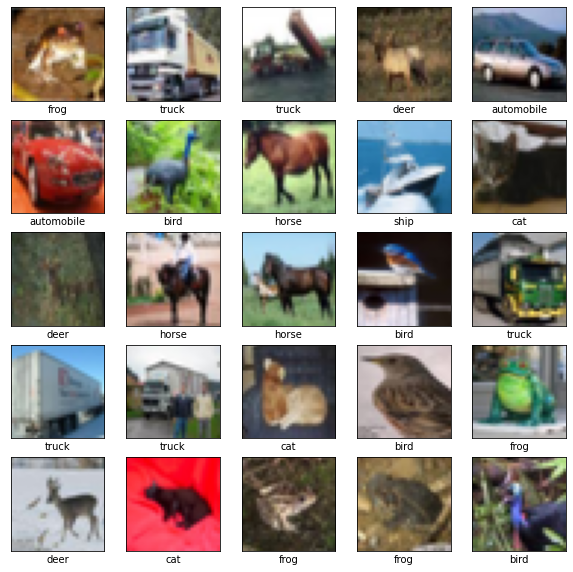

In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

**Custom Activation Functions**


In [0]:
# f(x) = sin(x)
def sin_act(x):
  return tf.math.sin(x, name=None)

# f(x) = ln(1 + e^x)
def softPlus(x):
  return tf.math.log(1.0 + tf.math.exp(x, name=None))

# f(x) = arctan(x)
def arcTan(x):
  return tf.math.atan(x)


# f(x) = ln(1 + (e^x/(1 + e^x)))
def custom_1(x):
  return tf.math.log(1.0 + (tf.math.exp(x) / (1.0 + tf.math.exp(x))))


# f(x) = ((x^2 + 1)^(1/2) + x)/2 - 1
def custom_2(x):
  return ((tf.math.sqrt(x**2+1) - 1.0) / 2.0 + 0.5*x)

#f(x)=((log(sin^2(x)+2))-1)
def custom_3(x):
  return ((tf.math.log(tf.math.sin(x)**2+2) - 1.0) )


### Create the convolutional base

CIFAR images format - `(32, 32, 3)`


![alt text](https://raw.githubusercontent.com/rahuldkjain/classification-using-custom-activation-functions/master/assets/cnn-cifar.png)

In [0]:
def createConvolutionalBase(activationFunction):
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation=activationFunction, input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation=activationFunction))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation=activationFunction))
  return model

Let's display the architecture of our model so far.

In [0]:
# model = createConvolutionalBase(sin_act)
# model.summary()

### Add Dense layers on top
![alt text](https://raw.githubusercontent.com/rahuldkjain/classification-using-custom-activation-functions/master/assets/cnn-cifar-complete.png)

In [0]:
def addDenseLayerOnTop(model, activationFunction):
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation=activationFunction))
  model.add(layers.Dense(10))

Here's the complete architecture of our model.

In [0]:
# addDenseLayerOnTop(model, sin_act)
# model.summary()

As you can see, our (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.

### Compile and train the model

In [0]:
def compileAndTrainModel(model, epochs):
  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  history = model.fit(train_images, train_labels, epochs=epochs, 
                      validation_data=(test_images, test_labels))
  return history

In [0]:
# history = compileAndTrainModel(model)

 ### Plot

In [0]:
def plot(history, title, type_1, type_2, yLabel):
  plt.plot(history.history[type_1], label=type_1)
  plt.plot(history.history[type_2], label = type_2)
  plt.title(title)
  plt.xlabel('Epoch')
  plt.ylabel(yLabel)
  plt.ylim([0.0, 0.9])
  plt.legend(loc='lower right')

### Evaluate the model

In [0]:
def evaluateModel(model, history):
  test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
  return test_loss, test_acc

In [0]:
def run(activationFunction, epochs):
  print('***************************'+ str(activationFunction) + ' ACTIVATION FUNCTION**********************')
  model = createConvolutionalBase(activationFunction)

  addDenseLayerOnTop(model, activationFunction)

  history = compileAndTrainModel(model, epochs)
  test_loss, test_acc = evaluateModel(model, history)

  print('Test Accuracy -> '+str((test_acc)*100)+'%')
  print('Test Loss -> '+str(test_loss)+'%')
  
  return history

### Let's test the CNN model with custom Activation Functions

#### Sigmoid Activation

***************************sigmoid ACTIVATION FUNCTION**********************
Epoch 1/10
1563/1563 [==============================] - 7s 5ms/step - loss: 2.0608 - accuracy: 0.2282 - val_loss: 1.7699 - val_accuracy: 0.3575
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6593 - accuracy: 0.4027 - val_loss: 1.5765 - val_accuracy: 0.4357
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5304 - accuracy: 0.4507 - val_loss: 1.4742 - val_accuracy: 0.4680
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4489 - accuracy: 0.4798 - val_loss: 1.4375 - val_accuracy: 0.4847
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3841 - accuracy: 0.5034 - val_loss: 1.3597 - val_accuracy: 0.5128
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3268 - accuracy: 0.5251 - val_loss: 1.3285 - val_accuracy: 0.5219
Epoch 7/10
1563/1563 [==============================] - 7s 

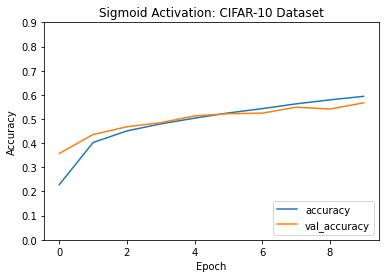

In [0]:
sigmoidHistory = run('sigmoid', 10)
plot(sigmoidHistory, 'Sigmoid Activation: CIFAR-10 Dataset', 'accuracy', 'val_accuracy', 'Accuracy')

#### ReLU Activation

***************************relu ACTIVATION FUNCTION**********************
Epoch 1/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5089 - accuracy: 0.4524 - val_loss: 1.2665 - val_accuracy: 0.5465
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1408 - accuracy: 0.5985 - val_loss: 1.0693 - val_accuracy: 0.6215
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9857 - accuracy: 0.6556 - val_loss: 0.9788 - val_accuracy: 0.6614
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8880 - accuracy: 0.6908 - val_loss: 1.0192 - val_accuracy: 0.6461
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8121 - accuracy: 0.7168 - val_loss: 0.8917 - val_accuracy: 0.6883
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7580 - accuracy: 0.7335 - val_loss: 0.8872 - val_accuracy: 0.6950
Epoch 7/10
1563/1563 [==============================] - 7s 5ms

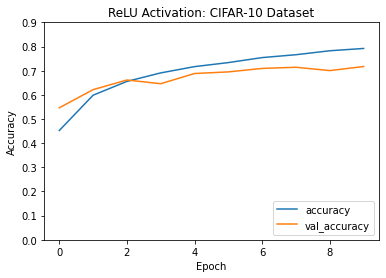

In [0]:
reluHistory = run('relu', 10)
plot(reluHistory, 'ReLU Activation: CIFAR-10 Dataset', 'accuracy', 'val_accuracy', 'Accuracy')

#### Tanh Activation

***************************tanh ACTIVATION FUNCTION**********************
Epoch 1/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4079 - accuracy: 0.5003 - val_loss: 1.1912 - val_accuracy: 0.5828
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1305 - accuracy: 0.6048 - val_loss: 1.0914 - val_accuracy: 0.6225
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0368 - accuracy: 0.6399 - val_loss: 1.0490 - val_accuracy: 0.6369
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9672 - accuracy: 0.6634 - val_loss: 1.0532 - val_accuracy: 0.6348
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9132 - accuracy: 0.6850 - val_loss: 1.0200 - val_accuracy: 0.6486
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8643 - accuracy: 0.7026 - val_loss: 0.9901 - val_accuracy: 0.6567
Epoch 7/10
1563/1563 [==============================] - 7s 4ms

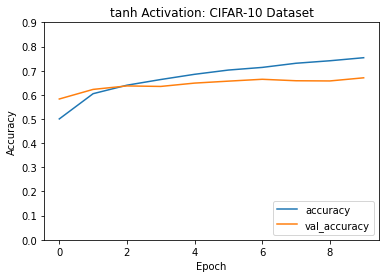

In [0]:
tanhHistory = run('tanh', 10)
plot(tanhHistory, 'tanh Activation: CIFAR-10 Dataset', 'accuracy', 'val_accuracy', 'Accuracy')

#### arcTan Activation

***************************<function arcTan at 0x7f922999c620> ACTIVATION FUNCTION**********************
Epoch 1/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4374 - accuracy: 0.4916 - val_loss: 1.2435 - val_accuracy: 0.5659
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1373 - accuracy: 0.6035 - val_loss: 1.0714 - val_accuracy: 0.6269
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0252 - accuracy: 0.6439 - val_loss: 1.0484 - val_accuracy: 0.6387
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9546 - accuracy: 0.6682 - val_loss: 1.0135 - val_accuracy: 0.6511
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8982 - accuracy: 0.6890 - val_loss: 1.0177 - val_accuracy: 0.6564
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8482 - accuracy: 0.7049 - val_loss: 0.9660 - val_accuracy: 0.6723
Epoch 7/10
1563/1563 [=========

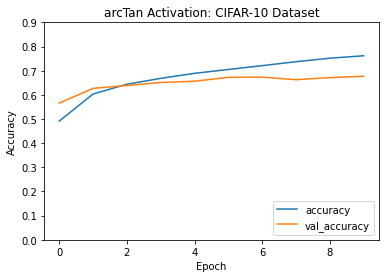

In [0]:
arcTanHistory = run(arcTan, 10)
plot(arcTanHistory, 'arcTan Activation: CIFAR-10 Dataset', 'accuracy', 'val_accuracy', 'Accuracy')

#### Custom-1 Activation

***************************<function custom_1 at 0x7f922999c730> ACTIVATION FUNCTION**********************
Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.2760 - accuracy: 0.1176 - val_loss: 2.0235 - val_accuracy: 0.2615
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9083 - accuracy: 0.3022 - val_loss: 1.7783 - val_accuracy: 0.3637
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7041 - accuracy: 0.3878 - val_loss: 1.6237 - val_accuracy: 0.4179
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5860 - accuracy: 0.4335 - val_loss: 1.5648 - val_accuracy: 0.4398
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5052 - accuracy: 0.4610 - val_loss: 1.4570 - val_accuracy: 0.4779
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4437 - accuracy: 0.4840 - val_loss: 1.4172 - val_accuracy: 0.4933
Epoch 7/10
1563/1563 [=======

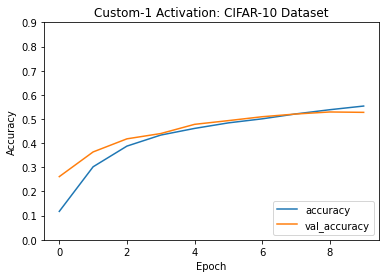

In [0]:
custom_1_History = run(custom_1, 10)
plot(custom_1_History, 'Custom-1 Activation: CIFAR-10 Dataset', 'accuracy', 'val_accuracy', 'Accuracy')

#### Custom-2 Activation

***************************<function custom_2 at 0x7f922999c7b8> ACTIVATION FUNCTION**********************
Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4880 - accuracy: 0.4640 - val_loss: 1.2261 - val_accuracy: 0.5651
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1291 - accuracy: 0.6014 - val_loss: 1.0584 - val_accuracy: 0.6281
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9684 - accuracy: 0.6599 - val_loss: 0.9802 - val_accuracy: 0.6637
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8602 - accuracy: 0.7003 - val_loss: 0.9169 - val_accuracy: 0.6878
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7761 - accuracy: 0.7291 - val_loss: 0.8732 - val_accuracy: 0.6995
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7040 - accuracy: 0.7512 - val_loss: 0.8916 - val_accuracy: 0.7027
Epoch 7/10
1563/1563 [=======

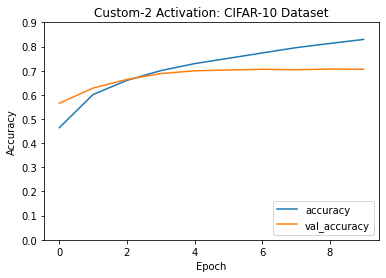

In [0]:
custom_2_History = run(custom_2, 10)
plot(custom_2_History, 'Custom-2 Activation: CIFAR-10 Dataset', 'accuracy', 'val_accuracy', 'Accuracy')

####Custom-3 Activation

***************************<function custom_3 at 0x7f922999c840> ACTIVATION FUNCTION**********************
Epoch 1/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.8009 - accuracy: 0.3522 - val_loss: 1.5179 - val_accuracy: 0.4614
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3995 - accuracy: 0.5051 - val_loss: 1.3673 - val_accuracy: 0.5173
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2318 - accuracy: 0.5688 - val_loss: 1.2501 - val_accuracy: 0.5603
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1064 - accuracy: 0.6114 - val_loss: 1.1694 - val_accuracy: 0.5894
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0061 - accuracy: 0.6507 - val_loss: 1.1244 - val_accuracy: 0.6056
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9203 - accuracy: 0.6801 - val_loss: 1.0826 - val_accuracy: 0.6180
Epoch 7/10
1563/1563 [=======

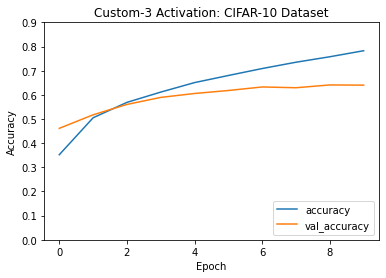

In [0]:
custom_3_History = run(custom_3, 10)
plot(custom_3_History, 'Custom-3 Activation: CIFAR-10 Dataset', 'accuracy', 'val_accuracy', 'Accuracy')

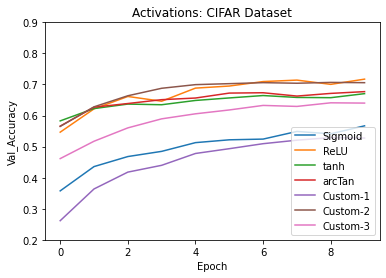

In [28]:
# Validation Accuracy Comparison
plt.plot(sigmoidHistory.history['val_accuracy'], label = 'Sigmoid')
plt.plot(reluHistory.history['val_accuracy'], label='ReLU')
plt.plot(tanhHistory.history['val_accuracy'], label='tanh')
plt.plot(arcTanHistory.history['val_accuracy'], label='arcTan')
plt.plot(custom_1_History.history['val_accuracy'], label='Custom-1')
plt.plot(custom_2_History.history['val_accuracy'], label='Custom-2')
plt.plot(custom_3_History.history['val_accuracy'], label='Custom-3')
plt.title('Activations: CIFAR Dataset')
plt.xlabel('Epoch')
plt.ylabel('Val_Accuracy')
plt.ylim([0.2, 0.9])
plt.legend(loc='lower right')

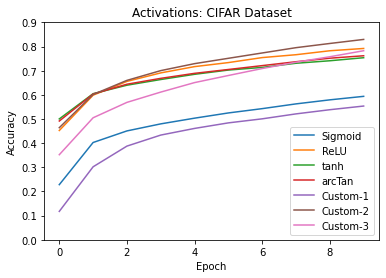

In [29]:
# Accuracy Comparison
plt.plot(sigmoidHistory.history['accuracy'], label = 'Sigmoid')
plt.plot(reluHistory.history['accuracy'], label='ReLU')
plt.plot(tanhHistory.history['accuracy'], label='tanh')
plt.plot(arcTanHistory.history['accuracy'], label='arcTan')
plt.plot(custom_1_History.history['accuracy'], label='Custom-1')
plt.plot(custom_2_History.history['accuracy'], label='Custom-2')
plt.plot(custom_3_History.history['accuracy'], label='Custom-3')
plt.title('Activations: CIFAR Dataset')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 0.9])
plt.legend(loc='lower right')

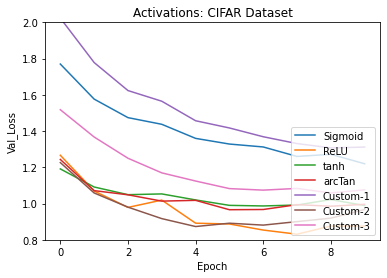

In [30]:
# Validation Loss Comparison
plt.plot(sigmoidHistory.history['val_loss'], label = 'Sigmoid')
plt.plot(reluHistory.history['val_loss'], label='ReLU')
plt.plot(tanhHistory.history['val_loss'], label='tanh')
plt.plot(arcTanHistory.history['val_loss'], label='arcTan')
plt.plot(custom_1_History.history['val_loss'], label='Custom-1')
plt.plot(custom_2_History.history['val_loss'], label='Custom-2')
plt.plot(custom_3_History.history['val_loss'], label='Custom-3')
plt.title('Activations: CIFAR Dataset')
plt.xlabel('Epoch')
plt.ylabel('Val_Loss')
plt.ylim([0.8, 2])
plt.legend(loc='lower right')

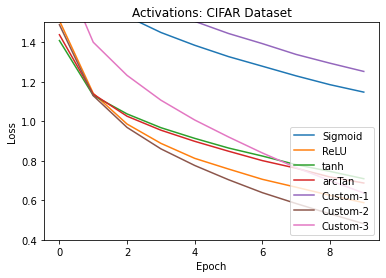

In [31]:
# Loss Comparison
plt.plot(sigmoidHistory.history['loss'], label = 'Sigmoid')
plt.plot(reluHistory.history['loss'], label='ReLU')
plt.plot(tanhHistory.history['loss'], label='tanh')
plt.plot(arcTanHistory.history['loss'], label='arcTan')
plt.plot(custom_1_History.history['loss'], label='Custom-1')
plt.plot(custom_2_History.history['loss'], label='Custom-2')
plt.plot(custom_3_History.history['loss'], label='Custom-3')
plt.title('Activations: CIFAR Dataset')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.4, 1.5])
plt.legend(loc='lower right')